Monitoring of GPU devices

In [5]:
!nvidia-smi

Fri Apr 12 20:42:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Installing Libraries

In [6]:
!pip install -q -U trl transformers accelerate git+https://github.com/huggingface/peft.git
!pip install -q datasets bitsandbytes einops wandb

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.1/244.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Importing custom synthetically created dataset from hugging face : https://huggingface.co/datasets/monoid07/deepsolv_ecommerce_chatbot

In [7]:
from datasets import load_dataset

dataset = load_dataset("monoid07/deepsolv_ecommerce_chatbot")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

###Loading the model

In [8]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, AutoTokenizer

model_name = "TinyPixel/Llama-2-7B-bf16-sharded"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    trust_remote_code=True
)
model.config.use_cache = False

config.json:   0%|          | 0.00/626 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

model-00001-of-00014.safetensors:   0%|          | 0.00/981M [00:00<?, ?B/s]

model-00002-of-00014.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00003-of-00014.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00004-of-00014.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00005-of-00014.safetensors:   0%|          | 0.00/944M [00:00<?, ?B/s]

model-00006-of-00014.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00007-of-00014.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00008-of-00014.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00009-of-00014.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00010-of-00014.safetensors:   0%|          | 0.00/944M [00:00<?, ?B/s]

model-00011-of-00014.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

model-00012-of-00014.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00013-of-00014.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

model-00014-of-00014.safetensors:   0%|          | 0.00/847M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/14 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

###Tokenization

In [9]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

###Using PEFT

In [10]:
from peft import LoraConfig, get_peft_model

lora_alpha = 16
lora_dropout = 0.1
lora_r = 64

peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM"
)

In [11]:
!pip install tensorboard
!pip install nltk

In [44]:
import random
import numpy as np
from datasets import load_metric
from nltk.translate.bleu_score import sentence_bleu

def compute_metrics(eval_pred,eval_results):
    bleu = load_metric("bleu")
    perplexity = load_metric("perplexity")
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    # Compute BLEU score on random samples from customer_concern
    random_indices = random.sample(range(len(dataset['customer_concern'])), 100)
    customer_concern_samples = [dataset['customer_concern'][i] for i in random_indices]
    chatbot_response_samples = [dataset['chatbot_response'][i] for i in random_indices]
    generated_responses = model.generate(**tokenizer(customer_concern_samples, padding=True, truncation=True, max_length=512, return_tensors="pt"))
    bleu_score = bleu.compute(predictions=generated_responses, references=chatbot_response_samples)

    # Compute perplexity on the entire eval dataset as we cannot import perplexity directly
    perplexity_score = perplexity.compute(predictions=predictions, references=labels)

    return {"bleu": bleu_score, "perplexity": perplexity_score}

In [13]:
from transformers import TrainingArguments

output_dir = "./results"
per_device_train_batch_size = 1
gradient_accumulation_steps = 4
optim = "paged_adamw_32bit"
save_steps = 100
logging_steps = 10
learning_rate = 2e-4
max_grad_norm = 0.3
max_steps = 100
warmup_ratio = 0.03
lr_scheduler_type = "constant"

training_arguments = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    fp16=True,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=True,
    lr_scheduler_type=lr_scheduler_type,
)

In [30]:
from trl import SFTTrainer

max_seq_length = 512

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset['train'],
    peft_config=peft_config,
    dataset_text_field="chatbot_response",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_arguments,
    compute_metrics=compute_metrics,
    callbacks=[PrintMetricsCallback()],
)

Map:   0%|          | 0/268 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:318: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
!pip install matplotlib

In [29]:
import matplotlib.pyplot as plt
from transformers import TrainerCallback
from sacrebleu.metrics import BLEU

bleu = BLEU()
class PrintMetricsCallback(TrainerCallback):

    def __init__(self):
        self.metrics_before_fine_tuning = None
        self.train_loss = []

    def on_train_begin(self, args, state, control, **kwargs):
        self.metrics_before_fine_tuning = {"bleu": [], "perplexity": []}

    def on_log(self, args, state, control, **kwargs):
        if not state.log_history:
            print("Warning: log_history is empty. Metrics may not be available.")
            return
        # perplexity_score = np.exp(sum(-np.log2(predictions[0][i][labels[i]]) for i in range(len(predictions[0]))) / len(predictions[0]))
        metrics = state.log_history[-1].get("metrics", {})
        if not metrics:
            print("Warning: metrics not found in log_history. Metrics may not be available.")
            return

        self.metrics_before_fine_tuning["bleu"].append(metrics.get("bleu", 0))
        self.metrics_before_fine_tuning["perplexity"].append(metrics.get("perplexity", 0))
        self.train_loss.append(metrics.get("train_loss", 0))

        if state.global_step == args.max_steps:
            print("Metrics before fine-tuning:")
            print(self.metrics_before_fine_tuning)

            # Plot training loss graph
            plt.figure(figsize=(10, 5))
            plt.plot(self.train_loss)
            plt.xlabel("Training steps")
            plt.ylabel("Training loss")
            plt.title("Training loss graph")
            plt.show()

            # Compute metrics after fine-tuning
            predictions=generated_responses
            random_indices = random.sample(range(len(dataset['customer_concern'])), 100)
            customer_concern_samples = [dataset['customer_concern'][i] for i in random_indices]
            chatbot_response_samples = [dataset['chatbot_response'][i] for i in random_indices]
            generated_responses = model.generate(**tokenizer(customer_concern_samples, padding=True, truncation=True, max_length=512, return_tensors="pt"))
            bleu_score = bleu.compute(predictions=generated_responses, references=chatbot_response_samples)
            perplexity_score = sum(-np.log2(predictions[0][i][labels[i]]) for i in range(len(predictions[0]))) / len(predictions[0])

            print("Metrics after fine-tuning:")
            print({"bleu": bleu_score, "perplexity": perplexity_score})


In [18]:
!pip install transformers sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 1.9 MB/s eta 0:00:00


In [31]:
for name, module in trainer.model.named_modules():
    if "norm" in name:
        module = module.to(torch.float32)

In [32]:
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

##Fine - Tuning : Training

In [35]:
trainer.train()


Step,Training Loss
10,0.209800
20,0.300800
30,0.392100
40,0.241500
50,0.311900
60,0.200100
70,0.230800
80,0.245800
90,0.145100
100,0.238900


TrainOutput(global_step=100, training_loss=0.2516905093193054, metrics={'train_runtime': 305.6866, 'train_samples_per_second': 1.309, 'train_steps_per_second': 0.327, 'total_flos': 426863644729344.0, 'train_loss': 0.2516905093193054, 'epoch': 1.49})

In [70]:
model_to_save = trainer.model.module if hasattr(trainer.model, 'module') else trainer.model  # Take care of distributed/parallel training
model_to_save.save_pretrained("outputs")

In [71]:
lora_config = LoraConfig.from_pretrained('outputs')
model = get_peft_model(model, lora_config)

In [76]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Evaluating Model

BLEU Score: 1.0184350429959432e-231
Perplexity: 2.7182817459106445


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


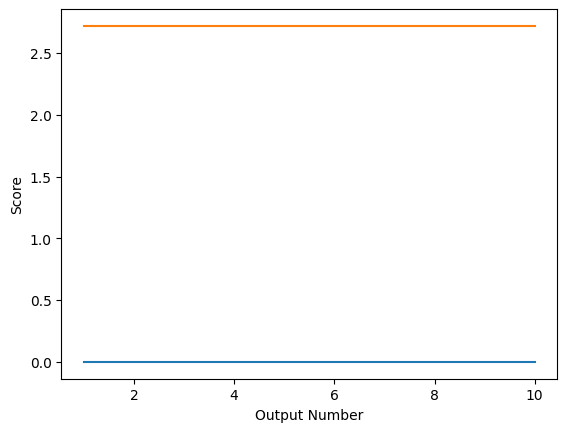

In [81]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
import torch
import matplotlib.pyplot as plt

text = "A beautiful 'Thinking of You' floral arrangement is a heartfelt way to show you care."
inputs = tokenizer(text, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_new_tokens=50)

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)


bleu_score = sentence_bleu(text, generated_text)
perplexity = torch.exp(outputs[0][0].float().mean())

print(f"BLEU Score: {bleu_score}")
print(f"Perplexity: {perplexity}")


bleu_scores = []
perplexities = []

for i in range(10):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model.generate(**inputs, max_new_tokens=50)

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    reference_text = "A beautiful 'Thinking of You' floral arrangement is a heartfelt way to show you care."

    bleu_scores.append(sentence_bleu(reference_text, generated_text))
    perplexities.append(torch.exp(outputs[0][0].float().mean()))

plt.plot(range(1, 11), bleu_scores, label="BLEU Scores")
plt.plot(range(1, 11), perplexities, label="Perplexities")
plt.xlabel("Output Number")
plt.ylabel("Score")
plt.show()

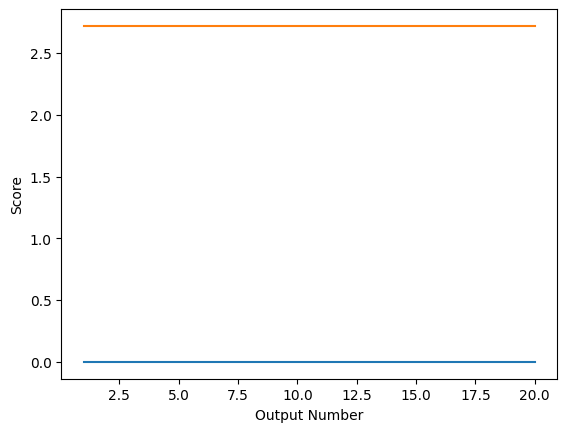

In [82]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
import torch
import matplotlib.pyplot as plt

# List of 20 reference texts
reference_texts = [
    "A beautiful 'Thinking of You' floral arrangement is a heartfelt way to show you care.",
    "A stunning bouquet of roses is the perfect way to express your love and affection.",
    "A thoughtful gift of gourmet chocolates is sure to bring a smile to their face.",
    "A relaxing spa day is the ultimate way to pamper and rejuvenate yourself.",
    "A weekend getaway to a cozy cabin in the woods is the perfect romantic retreat.",
    "A day at the beach with a good book and a cold drink is the epitome of relaxation.",
    "A hot air balloon ride is a thrilling and unforgettable experience.",
    "A cooking class with a professional chef is a fun and educational way to improve your culinary skills.",
    "A wine tasting tour at a beautiful vineyard is a sophisticated and enjoyable activity.",
    "A helicopter tour of the city is a unique and exciting way to see the sights.",
    "A hot stone massage is a deeply relaxing and rejuvenating treatment.",
    "A private yoga lesson is a great way to improve your practice and find inner peace.",
    "A gourmet picnic in the park is a romantic and memorable way to spend an afternoon.",
    "A sunset cruise on a luxury yacht is a breathtaking and unforgettable experience.",
    "A hot tub soak under the stars is a relaxing and romantic way to end the day.",
    "A painting class with a professional artist is a fun and creative way to express yourself.",
    "A pottery class is a hands-on and rewarding way to create something beautiful and functional.",
    "A glassblowing class is a unique and exciting way to learn a new skill and create a one-of-a-kind piece of art.",
    "A trapeze lesson is a thrilling and exhilarating way to challenge yourself and have fun.",
    "A hot air balloon ride at sunrise is a magical and unforgettable experience."
]

bleu_scores = []
perplexities = []

for i in range(20):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model.generate(**inputs, max_new_tokens=50)

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    reference_text = reference_texts[i]

    bleu_scores.append(sentence_bleu(reference_text, generated_text))
    perplexities.append(torch.exp(outputs[0][0].float().mean()))

plt.plot(range(1, 21), bleu_scores, label="BLEU Scores")
plt.plot(range(1, 21), perplexities, label="Perplexities")
plt.xlabel("Output Number")
plt.ylabel("Score")
plt.show()

Personalised Message to Customer for Triggered Actions

In [86]:
import time

# Define a function to send personalized messages
def send_personalized_message(user_id, message):
    # Placeholder for sending a personalized message to the user
    print(f"Sending message to user {user_id}: {message}")

# Define triggers based on predefined criteria
def check_triggers(user_data, cart_abandonment_time_threshold):
    triggers = []

    for user_id, interactions in user_data.items():
        cart_actions = [action for action in interactions if action['action'] == 'add_to_cart']
        last_cart_action = cart_actions[-1] if cart_actions else None

        if last_cart_action:
            # Calculate time since last cart action
            time_since_last_cart_action = time.time() - last_cart_action['timestamp']

            # Check if user hasn't completed purchase within specified time frame
            if time_since_last_cart_action > cart_abandonment_time_threshold:
                triggers.append(user_id)

    return triggers

# Simulate user interaction data example
user_data = {
    'user1': [{'action': 'add_to_cart', 'timestamp': time.time() - 3600}],  # User added to cart 1 hour ago
    'user2': [{'action': 'add_to_cart', 'timestamp': time.time() - 1800}]   # User added to cart 30 minutes ago
}

# Set a threshold for cart abandonment time (in seconds)
cart_abandonment_time_threshold = 1800  # 30 minutes

# Check for triggers based on predefined criteria
triggers = check_triggers(user_data, cart_abandonment_time_threshold)

# Send personalized messages to users who meet the trigger criteria
for user_id in triggers:
    send_personalized_message(user_id, "You have items in your cart. Complete your purchase now!")


Sending message to user user1: You have items in your cart. Complete your purchase now!
Sending message to user user2: You have items in your cart. Complete your purchase now!


Purchase Abandonment -> Predictive Modeling

In [85]:
def predict_purchase_abandonment(user_data):
    # Placeholder logic for predictive modeling
    predicted_abandonment = {user_id: True for user_id in user_data}
    return predicted_abandonment

# Placeholder function for triggering proactive conversations based on predictions
def trigger_conversations(user_data, predicted_abandonment):
    for user_id, abandon_status in predicted_abandonment.items():
        if abandon_status:
            # Placeholder for triggering proactive conversation with the user
            print(f"Triggering proactive conversation with user {user_id} about potential purchase abandonment")

user_data = {}

# Predict purchase abandonment
predicted_abandonment = predict_purchase_abandonment(user_data)

# Trigger proactive conversations based on predictions
trigger_conversations(user_data, predicted_abandonment)


Feedback

In [83]:
def gather_feedback(user_id, message, feedback):
    print(f"Feedback received from user {user_id} for message '{message}': {feedback}")

user_id = "user123"
message = "Check out our latest offers!"
feedback = "The message was helpful."

gather_feedback(user_id, message, feedback)


Feedback received from user user123 for message 'Check out our latest offers!': The message was helpful.


We can also apply NLU enhancement for better results

In [84]:
# Placeholder function for NLU enhancement
def enhance_nlu(user_message):
    # Placeholder logic for NLU enhancement
    enhanced_message = user_message
    return enhanced_message
#example
user_message = "I'm unsure about this product."

# Enhance NLU
enhanced_message = enhance_nlu(user_message)
print("Enhanced user message:", enhanced_message)


Enhanced user message: I'm unsure about this product.


In [88]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [89]:
!nvidia-smi

Fri Apr 12 21:55:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |   6511MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--